<a href="https://colab.research.google.com/github/gitmystuff/INFO4080/blob/main/Week_14-Wrap_Up/PDF_Word_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDF Word Problems

## Functions

### Probability Density Function

According to NIH SEMATECH (2022):

> For a continuous function, the probability density function (pdf) is the probability that the variate has the value x. Since for continuous distributions the probability at a single point is zero, this is often expressed in terms of an integral between two points.

Related Distributions. (February 13, 2022). In *NIST/SEMATECH e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

mu = 0.01, sigma = 1.00


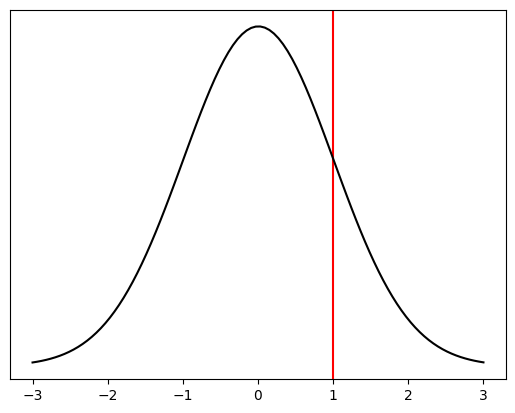

In [ ]:
# demonstrate pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = stats.norm.rvs(size=100000) # rvs = random variates

# get the parameter for a normal distribution
parameters = stats.norm.fit(data)
mu = parameters[0]
sigma = parameters[1] # sigma is std

# using unpacking
mu, sigma = parameters

print(f'mu = {mu:.2f}, sigma = {sigma:.2f}') # f strings https://zetcode.com/python/fstring/

# plot the PDF.
xmin, xmax = plt.xlim() # https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.xlim.html
x = np.linspace(-3, 3, 100)
params = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.axvline(x=1, color='red')
plt.yticks([])
# we could also do stats.norm.pdf(x, loc=0, scale=1)

plt.plot(x, params, 'k'); # k is short for the color black

### Cumulative Density Function

According to NIH SEMATECH (2022):

> The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x

Related Distributions. (February 13, 2022). In *NIST/SEMATECH e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

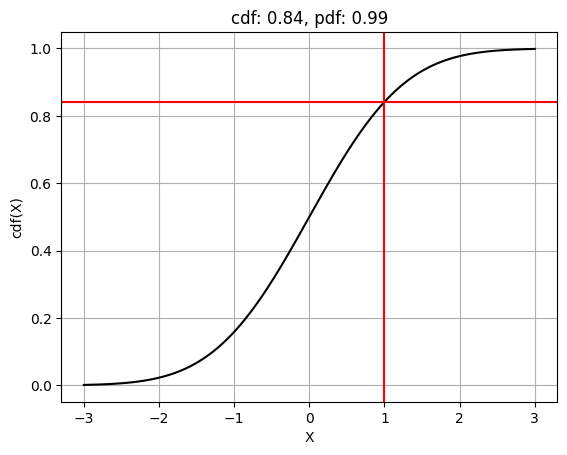

In [ ]:
# plot the cdf with ppf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mu = 0
sigma = 1
cdf_val = np.round(stats.norm.cdf(1, loc=mu, scale=sigma), 2)
ppf_val = np.round(stats.norm.ppf(cdf_val, loc=mu, scale=sigma), 2)

x = np.linspace(-3, 3, 100000)
cdf_y = stats.norm.cdf(x)
plt.plot(x, cdf_y, 'k')
plt.axvline(x=ppf_val, color='red')
plt.axhline(y=cdf_val, color='red')
plt.title(f'cdf: {cdf_val}, pdf: {ppf_val}')
plt.xlabel('X')
plt.ylabel('cdf(X)')
plt.grid(True)
plt.show();

### Percent Point Function

According to NIH SEMATECH (2022):

> The percent point function (ppf) is the inverse of the cumulative distribution function. For this reason, the percent point function is also commonly referred to as the inverse distribution function. That is, for a distribution function we calculate the probability that the variable is less than or equal to x for a given x. For the percent point function, we start with the probability and compute the corresponding x for the cumulative distribution.

Related Distributions. (February 13, 2022). In *NIST/SEMATECH e-Handbook of Statistical Methods*. https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

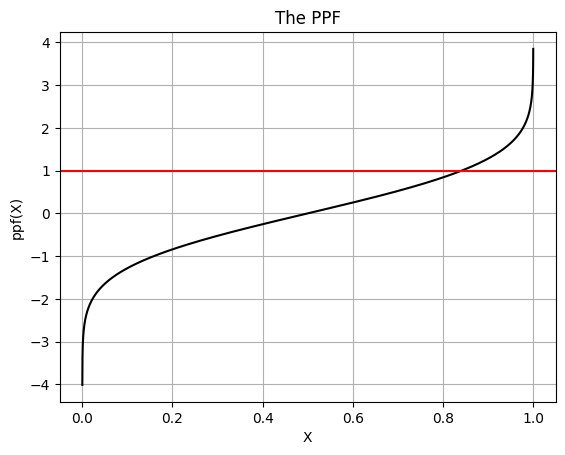

In [ ]:
# plot the ppf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(-3, 3, 100000)
ppf_y = stats.norm.ppf(x)
plt.plot(x, ppf_y, 'k', label='cdf')
plt.axhline(y=1, color='red')
plt.title('The PPF')
plt.xlabel('X')
plt.ylabel('ppf(X)')
plt.grid(True)
plt.show();

The corresponding percentile for 1 standard deviation above the mean (z) is 0.84% rounded, so,
a z score for 0.84  is 0.9846072920604602 and,
a z score for 50% is -0.0
for normal distributions.


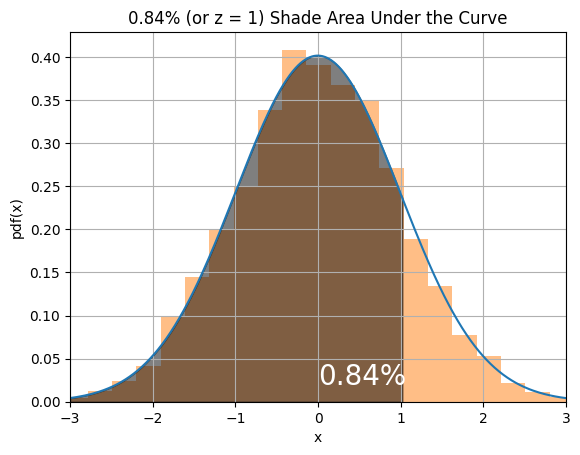

In [ ]:
# compare CDF and PPF
X = stats.norm.rvs(size=10000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters
# print(stats.norm.cdf(1, loc=mu, scale=sigma))
cdf_val = np.round(stats.norm.cdf(1, loc=mu, scale=sigma), 2)
ppf_val = np.round(stats.norm.ppf(.85, loc=mu, scale=sigma), 2)

print(f'The corresponding percentile for 1 standard deviation above the mean (z) is {cdf_val}% rounded, so,')
print(f'a z score for {cdf_val}  is {stats.norm.ppf(cdf_val, loc=mu, scale=sigma)} and,')
print(f'a z score for 50% is {np.round(stats.norm.ppf(0.5, loc=mu, scale=sigma), 2)}')
print('for normal distributions.')

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-3, 3)
ax.grid(True)

px=np.arange(-3, ppf_val, 0.01)
ax.fill_between(px, stats.norm.pdf(px,loc=mu,scale=sigma), alpha=0.5, color='k')
ax.text(0, 0.02, f'{cdf_val}%', fontsize=20, color='w')

plt.title(f'{cdf_val}% (or z = 1) Shade Area Under the Curve')
plt.show()

### Probability Mass Function

In probability and statistics, a probability mass function is a function that gives the probability that a discrete random variable is exactly equal to some value.[1] Sometimes it is also known as the discrete density function. The probability mass function is often the primary means of defining a discrete probability distribution, and such functions exist for either scalar or multivariate random variables whose domain is discrete.

https://en.wikipedia.org/wiki/Probability_mass_function


Discrete probability functions are referred to as probability mass functions and continuous probability functions are referred to as probability density functions. The term probability functions covers both discrete and continuous distributions.

https://www.itl.nist.gov/div898/handbook/eda/section3/eda361.htm

Bernoulli, Binomial, Geometric, Poisson - flip of coin, roll of 1 die or two dice

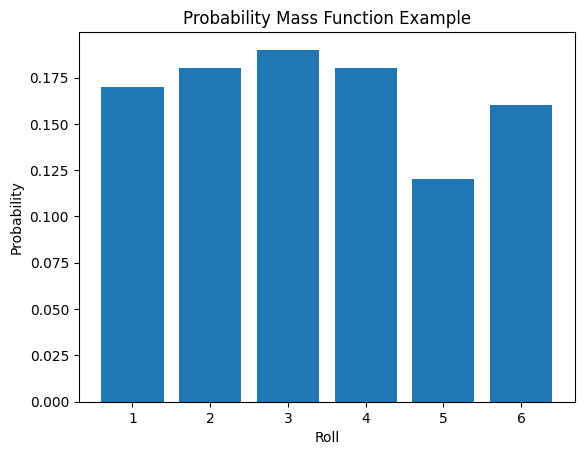

In [ ]:
# probability mass function
throws = 100
observations = []
for i in range(throws):
    roll = np.random.choice(['1', '2', '3', '4', '5', '6']) # roll the die
    observations.append(roll)

val, cnt = np.unique(observations, return_counts=True)
prop = cnt / len(observations)

plt.bar(val, prop)
plt.ylabel('Probability')
plt.xlabel('Roll')
plt.title('Probability Mass Function Example')
plt.show()

## Distributions

Discrete distributions: all probabilities add up to one
* Uniform
* Bernoulli
* Binomial
* Poisson

Continuous distributions: area under curve adds up to one
* Normal
* z
* t
* Chi-Square

### The Normal (Gaussian) Distribution

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm

### Central Limit Theorem

### Normal Distribution Equation

Compare the formula for the normal distribution as shown below

$
\frac{1}{\sqrt{2\pi\sigma^2}}\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}
$

with the python code below

1/(np.sqrt(2 * np.pi * sigma&ast;&ast;2)) * np.exp( - (x - mu)&ast;&ast;2 / (2 * sigma&ast;&ast;2))

Let's break the code down:
* x = our set of numbers
* mu = mean
* sigma&ast;&ast;2 (sigma squared) = variance of x (sigma = std)
* exp = exponential
* 1 is our numerator
* np.sqrt(2 * np.pi * sigma&ast;&ast;2) = $\sqrt{2\pi\sigma^2}$ NOTE: the two asterisk designate a power such as squared
* np.exp( - (x - mu)&ast;&ast;2 / (2 * sigma&ast;&ast;2)) = $\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}$

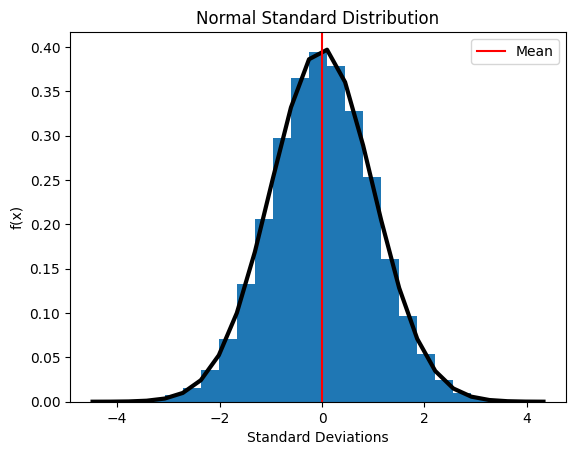

In [ ]:
# standard normal distribution with numpy
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 1
x = np.random.normal(0, 1, 100000)
count, bins, ignored = plt.hist(x, density=True, bins=25)

# plot the distribution curve
plt.plot(bins, 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='k')
plt.xlabel('Standard Deviations')
plt.ylabel('f(x)')
plt.axvline(x=mu, color='red', label='Mean')
plt.title('Normal Standard Distribution')
plt.legend()
plt.show()

In [ ]:
# standard normal distribution with stats
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html
import scipy.stats as stats

data = stats.norm.rvs(size=100000)
descr = stats.describe(data)
print(descr)
print('Skewness of data: ', descr.skewness)

DescribeResult(nobs=100000, minmax=(-4.486963619147619, 4.420410565537393), mean=0.006933158052121168, variance=1.0078025953094416, skewness=-0.02104338979451038, kurtosis=0.018436574925258853)
Skewness of data:  -0.02104338979451038


In [ ]:
# f strings: https://realpython.com/python-f-strings/
import math

print(f'The variance is {data.var()}')
print(f'The standard deviation is {data.std()}')
print(f'The square root of the variance is {math.sqrt(data.var())}')

The variance is 1.0077925172834885
The standard deviation is 1.0038886976570105
The square root of the variance is 1.0038886976570105


### z Distribution

* mu = 0
* sigma = 1
* 68% of the data lies within -1, 1 deviation
* 95.45% of the data lies within -2, 2 deviations
* 99.73% of the data lies within -3, 3 deviations
* Emprical rule 68, 95, 99.7 rule. https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
* z score: $z = \frac{x-\mu}{\sigma}$

In [ ]:
# using cdf and
from scipy import stats

z = .7
print(f'z score of {z} = {stats.norm.cdf(z)} percentile')
percentile = .95
print(f'{percentile} percentile = z score of {stats.norm.ppf(percentile)}')

z score of 0.7 = 0.758036347776927 percentile
0.95 percentile = z score of 1.6448536269514722


In [ ]:
# clock maker operating costs
import numpy as np

monthly_avg_of_clocks = 100
std_dev = 20

# monthly operating cost f(X) = $10X + $1000
monthly_cost = 10 * 100 + 1000 # expected
print(monthly_cost)
std_dev_operate = np.abs(10) * std_dev
print(std_dev_operate)
# we know that about 95% of the time our operating costs will be between 1600 and 2400 (2 standard deviations)

2000
200


### Uniform Distribution

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3662.htm

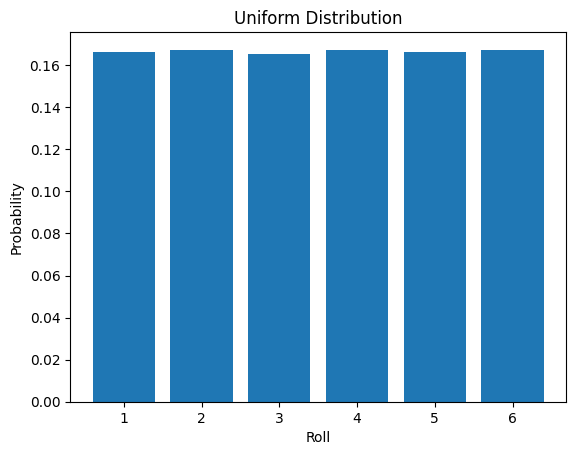

In [ ]:
# uniform distribution
throws = int(1e5)
observations = []
for i in range(throws):
    roll = np.random.choice(['1', '2', '3', '4', '5', '6']) # roll the die
    observations.append(roll)

val, cnt = np.unique(observations, return_counts=True)
prop = cnt / len(observations)

plt.bar(val, prop)
plt.ylabel('Probability')
plt.xlabel('Roll')
plt.title('Uniform Distribution')
plt.show()

### Binomial Distribution

Formula:<br />
$P(x: n,p) = \binom {n}{x} p^x (1 - p)^{(n-x)}$

* n trials
* x successes

According to StatisticsHowTo (2022):

> A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice). For example, a coin toss has only two possible outcomes: heads or tails and taking a test could have two possible outcomes: pass or fail.

Binomial Distribution: Formula, What it is, How to use it. (February 13, 2022). In *StatisticsHowTo*. https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/

More info:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
* https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
* https://stattrek.com/online-calculator/binomial.aspx

Define success

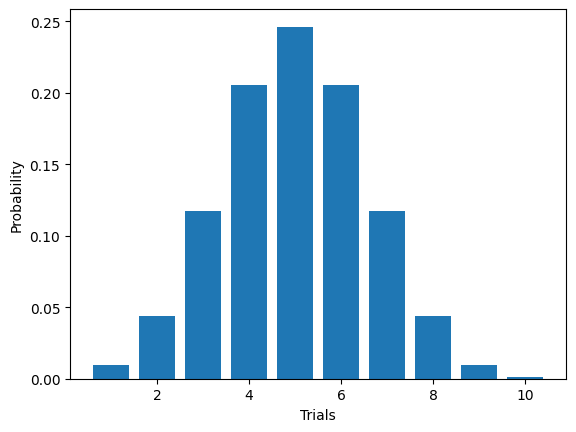

In [ ]:
# binomial distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# binom.pmf(x, n, p, loc)

n = 10
p = 0.5
trials = list(range(1, n + 1))
probs = [stats.binom.pmf(x, n, p) for x in trials]

plt.bar(trials, probs)
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.show()

In [ ]:
# define success - getting heads; A fair coins is flipped 10 times. What is the probability of getting 5 heads?
from scipy import stats

stats.binom.pmf(5, 10, .5)

0.24609375000000003

In [ ]:
# # hh, ht, th, tt
stats.binom.pmf(2, 2, .5)

0.25

### Bernoulli Distribution

Success vs Failure
* P(Success) is constant 1/2, 1/6
* Trials are independent

https://en.wikipedia.org/wiki/Bernoulli_distribution

https://vitalflux.com/bernoulli-probability-distribution-explained-with-python-examples/

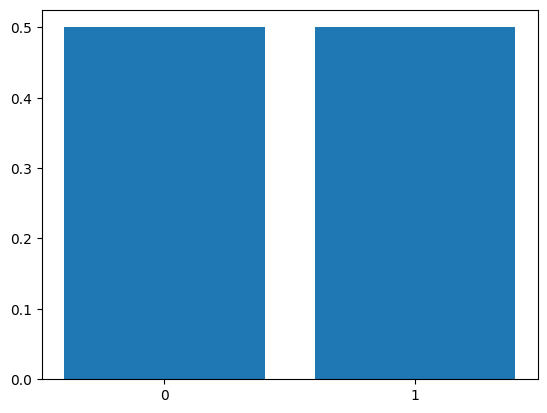

In [ ]:
# import matplotlib.pyplot as plt
from scipy.stats import bernoulli

bdist = bernoulli(0.5)
X = [0, 1]

fig, ax = plt.subplots()
ax.bar(X, bdist.pmf(X))
ax.set_xticks(np.arange(0, 2))
plt.show()

### Multinomial Distribution

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html
* https://www.statology.org/multinomial-distribution/
* https://www.statology.org/multinomial-distribution-in-python/
* https://www.euanrussano.com/post/probability/multinoulli_multinomial/

In [ ]:
# https://www.statology.org/multinomial-distribution-in-python/
from scipy.stats import multinomial

multinomial.pmf(x=[2, 4, 4], n=10, p=[.1, .4, .5])
# probability of 2, 4, 4 happening given probabilities

0.05040000000000001

In [ ]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html
import numpy as np

np.random.multinomial(n=20, pvals=[1/6.]*6, size=1)
# rolling a die 20 times; one appears x times, two appears x times, three appears x times, etc

array([[6, 3, 3, 1, 6, 1]])

In [ ]:
np.random.multinomial(20, [1/6.]*6, size=2)
# rolling 20 times and then 20 times again

array([[6, 2, 2, 5, 4, 1],
       [3, 1, 6, 4, 1, 5]])

### Poisson Distribution

$P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$

* lambda = mu = expected value
* P(Success) is proportional through the entire interval (lambda(minute) = lambda(hour)/60)

A Poisson distribution is a tool that helps to predict the probability of certain events happening when you know how often the event has occurred. It gives us the probability of a given number of events happening in a fixed interval...

Stephanie Glen. "Poisson Distribution / Poisson Curve: Simple Definition" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/probability-distribution/poisson-distribution/

More info:
* https://stattrek.com/probability-distributions/poisson.aspx
* https://hadrienj.github.io/posts/Essential-Math-poisson_distribution/
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
* https://www.analyticsvidhya.com/blog/2022/06/predicting-the-scoreline-of-a-football-match-using-poisson-distribution/

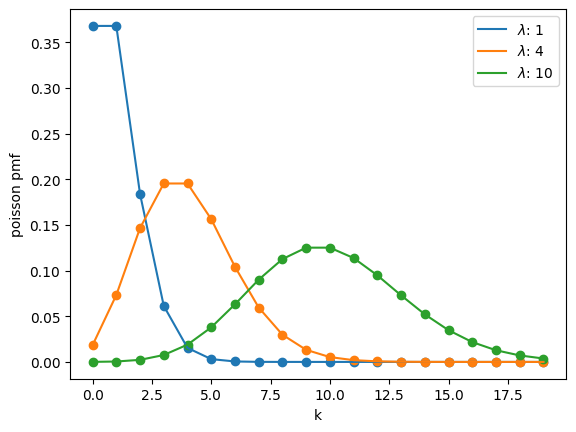

In [ ]:
# plot some poisson distributions
from scipy.stats import poisson

k = np.arange(0, 20)

for lambd in [1, 4, 10]:
    distribution = []
    for i in k:
        distribution.append(poisson.pmf(i, lambd))

    plt.plot(k, distribution, label=f'$\lambda$: {lambd}')
    plt.scatter(k, distribution)

plt.xlabel('k')
plt.ylabel('poisson pmf')
plt.legend();

In [ ]:
from scipy.stats import poisson

poisson.pmf(k=5, mu=4) # mu = lambda = expected value
# what's the probability that 5 things will happen given an average of 4 things happening in a period of time

0.1562934518505317

### t Distribution

https://www.statisticshowto.com/probability-and-statistics/t-distribution/

The z-distribution assumes we know the population standard deviation while the t-distribution uses the sample standard deviation. The following is a review of the equations for both means and standard deviations: <br />

**The Population Mean** <br />
$\mu = \frac{\sum{x_i}}{N}$<br />
**The Sample Mean** <br />
$\bar{x} = \frac{\sum{x_i}}{n}$<br />
**The Population Standard Deviation** <br />
$
\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}
$ <br />
**The Sample Standard Deviation** <br />
$
s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}
$

Notice we're using Bessel's correction again. We can also call this a degree of freedom. Let's look at some standard deviations for our data.

In [ ]:
# compare population and sample
data = stats.norm.rvs(size=1000)
print(f'Population mean: {np.round(np.mean(data), 4)}')
print(f'Sample mean: {np.round(np.mean(data), 4)}')
print(f'Population standard deviation: {np.round(np.std(data, ddof=0), 4)}')
print(f'Sample standard deviation: {np.round(np.std(data, ddof=1), 4)}')

Population mean: -0.0505
Sample mean: -0.0505
Population standard deviation: 1.0408
Sample standard deviation: 1.0413


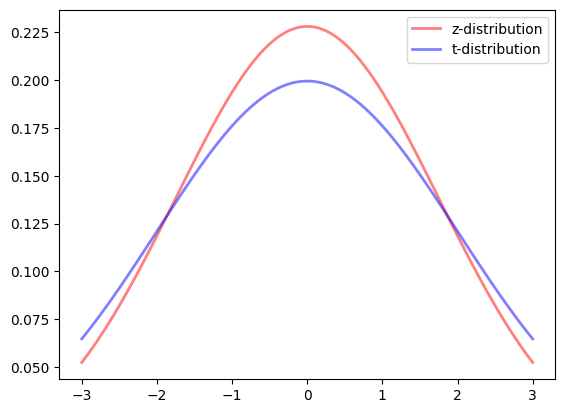

In [ ]:
# compare the z and t distribution be exaggerating the standard deviation of the t distribution
X = np.linspace(-3, 3, 100)
parameters = stats.norm.fit(X)
mu, sigma = parameters

# the z distribution
zs = stats.norm.pdf(X, loc=mu, scale=sigma)
plt.plot(X, zs, 'r', linewidth=2, alpha=0.5, label='z-distribution')

# the t distribution
ts = stats.norm.pdf(X, loc=mu, scale=2)
plt.plot(X, ts, 'b', linewidth=2, alpha=0.5, label='t-distribution')

plt.legend()
plt.show()

## Word Problems

Thanks to George Ingersoll

https://www.linkedin.com/in/georgeingersoll/

The area between -3 and 3 is considered to contains 99.73% of the area in the curve
The area between -2 and 2 is considered to contains 95.44% of the area in the curve
The area between -1 and 1 is considered to contains 68.26% of the area in the curve
The line at 0 is the expected average of the normal distribution at 50%

Mean:  0.004922357221691209
Median:  0.003677704383763856
Mode? -4.003750119757393
Variance:  1.0005165316148026
Standard Deviation:  1.0002582324653981


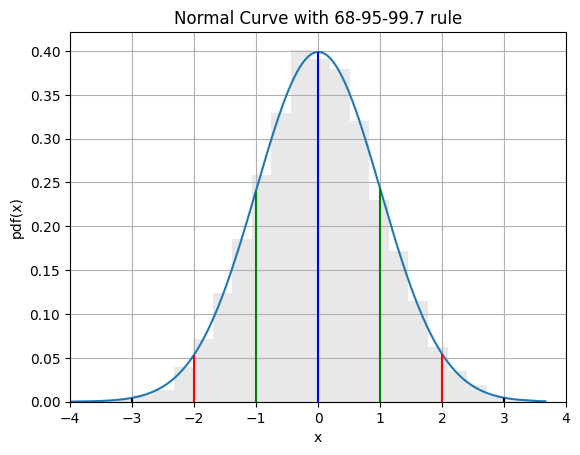

In [ ]:
# the normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = stats.norm.rvs(size=10000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

print('The area between -3 and 3 is considered to contains 99.73% of the area in the curve')
print('The area between -2 and 2 is considered to contains 95.44% of the area in the curve')
print('The area between -1 and 1 is considered to contains 68.26% of the area in the curve')
print('The line at 0 is the expected average of the normal distribution at 50%')
print()
print('Mean: ', np.mean(X))
print('Median: ', np.median(X))
print('Mode?', X[1])
print('Variance: ', np.var(X))
print('Standard Deviation: ', np.std(X))

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')

plt.title('Normal Curve with 68-95-99.7 rule')
plt.show()

### Problem 1

The life of a phone is normally distributed with an average of 3.4 years and a standard deviation of 1.2 years.
* z = (x – mu)/ std

In [ ]:
# # What percentage of smartphones last more than 5 years?
# mu = 3.4
# sigma = 1.2

# X = np.linspace(-1, 8, 10000)
# plt.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
# plt.vlines(x=mu, ymin=0, ymax=stats.norm.pdf(mu, loc=mu, scale=sigma), color='black')
# plt.vlines(x=5, ymin=0, ymax=stats.norm.pdf(5, loc=mu, scale=sigma), color='green')

# plt.title('Normal Distribution')
# plt.xlabel('Values of Random Variable X')
# plt.ylabel('Probability')
# plt.show()

In [ ]:
# # What percentage of smartphones last more than 5 years using z score?
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# Xstand = stats.norm.rvs(size=10000)
# Xstand.sort()

# z = (5 - 3.4)/1.2

# parameters = stats.norm.fit(Xstand)
# mu, sigma = parameters

# fig, ax = plt.subplots()
# ax.plot(Xstand, stats.norm.pdf(Xstand, loc=mu, scale=sigma))
# ax.hist(Xstand, bins=25, density=True, color='lightgray', alpha=0.5)
# ax.set_xlabel('x')
# ax.set_ylabel('pdf(x)')
# ax.set_xlim(-4, 4)
# ax.grid(True)

# plt.vlines(x=z, ymin=0, ymax=stats.norm.pdf(z, loc=mu, scale=sigma), color='black')

# plt.title(f'z={z} or {stats.norm.cdf(z)}')
# z = 1.3333
# cdf_test = stats.norm.cdf(z)
# print(cdf_test)
# ppf_test = stats.norm.ppf(cdf_test)
# print(ppf_test)
# plt.show()

In [ ]:
# # plot percentage between 2 and 4 years
# mu = 3.4
# sigma = 1.2
# X = np.linspace(-1, 8, 10000)
# plt.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
# plt.vlines(x=mu, ymin=0, ymax=stats.norm.pdf(mu, loc=mu, scale=sigma), color='black')
# plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='green')
# plt.vlines(x=4, ymin=0, ymax=stats.norm.pdf(4, loc=mu, scale=sigma), color='green')

# plt.title('Normal Distribution')
# plt.xlabel('Values of Random Variable X')
# plt.ylabel('Probability')
# plt.show()

In [ ]:
# # What percentage last between 2 and 4 years?
# zlo = (2-3.4)/1.2
# print(stats.norm.cdf(zlo))

# zhi = (4-3.4)/1.2
# print(stats.norm.cdf(zhi))

In [ ]:
# # What is the middle 50% range for smartphone lifespans?
# mu = 3.4
# sigma = 1.2
# X = np.linspace(-1, 8, 10000)
# zlo = stats.norm.ppf(.25, loc=3.4, scale=1.2)
# zhi = stats.norm.ppf(.75, loc=3.4, scale=1.2)

# plt.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
# plt.vlines(x=mu, ymin=0, ymax=stats.norm.pdf(mu, loc=mu, scale=sigma), color='black')
# plt.vlines(x=zlo, ymin=0, ymax=stats.norm.pdf(zlo, loc=mu, scale=sigma), color='green')
# plt.vlines(x=zhi, ymin=0, ymax=stats.norm.pdf(zhi, loc=mu, scale=sigma), color='green')

# plt.title('Normal Distribution')
# plt.xlabel('Values of Random Variable X')
# plt.ylabel('Probability')
# plt.show()

In [ ]:
# # the normal curve
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# Xstand = stats.norm.rvs(size=10000)
# Xstand.sort()

# parameters = stats.norm.fit(Xstand)
# mu, sigma = parameters


# fig, ax = plt.subplots()
# ax.plot(Xstand, stats.norm.pdf(Xstand, loc=mu, scale=sigma))
# ax.hist(Xstand, bins=25, density=True, color='lightgray', alpha=0.5)
# ax.set_xlabel('x')
# ax.set_ylabel('pdf(x)')
# ax.set_xlim(-4, 4)
# ax.grid(True)

# plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
# plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
# plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
# plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
# plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
# plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
# plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')

# plt.title('Normal Curve with 68-95-99.7 rule')
# plt.show()

In [ ]:
# What is the middle 50% range for smartphone lifespans?


### Problem 2

For every inch of rainfall in a region over the course of a day, a river rises downstream by 6 inches. Currently the river is running 3 feet below the tops of its banks. Tomorrow the forecast gives a 60% chance of rain. When it rains in this region, the average amount to fall is 4 inches with a standard deviation of 1.6 inches and normal distribution.

* x = 6
* m = 4
* std = 1.6

In [ ]:
# What is the probability that the river will rise above its banks and flood the downstream region tomorrow?


### Problem 3

Subway train departures in a city are 10 minutes late on average with a normal distribution and a standard deviation of 6 minutes.

In [ ]:
# # plot the range of train departure
# mu = 10
# sigma = 6

# X = np.linspace(-5, 25, 10000)

# plt.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
# plt.vlines(x=mu, ymin=0, ymax=stats.norm.pdf(mu, loc=mu, scale=sigma), color='black')
# plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='green')
# plt.vlines(x=15, ymin=0, ymax=stats.norm.pdf(15, loc=mu, scale=sigma), color='green')

# plt.title('Normal Distribution')
# plt.xlabel('Values of Random Variable X')
# plt.ylabel('Probability')
# plt.show()

In [ ]:
# What is the probability of a train departing somewhere in the range between on-time and 15 minutes late?


### Problem 4

The average speed of motorists on a highway is measured by the time it takes each car to travel between two pay stations which are 60 miles apart. During one off-peak hour, 10,000 cars arrive at the second pay station. During this time, the average time it takes a car to travel between the two pay stations is 50 minutes. The average speed of the cars is normally distributed.

In [ ]:
# If it takes 1000 cars more than an hour to reach the second pay station,
# what is the standard deviation for speed in miles per hour during that one-hour period?
# (x-mu) / std


In [ ]:
# If the highway patrol decides to give tickets to the fastest 5% of motorists,
# at what speed (mph) will they need to start giving out tickets?
# (x - 72) / std = z.95


### Problem 5

The mayor of Denton is a member of the city council and is elected with a majority of council votes. The council is made up of eleven members, including the mayor. The mayor is being challenged by one of the other council members during an election. If the incumbent and challenger will each vote for themselves, and each of the other council members have a 60% probability of voting for the incumbent, what is the probability that the incumbent mayor will be reelected?

* stats.binom.pmf(x, n, p)
* n = 9
* k >= 5 (for a majority)
* p = .6


In [ ]:
# stats.binom.pmf(5, 9, .6) if k = 5 but since k >= 5 we have to add percentage


### Problem 6

A quality control engineer is in charge of testing whether a factory’s production process is meeting specifications. One specification states that at least 85% of all products made by the factory must meet a certain standard of quality. To test this specification, the engineer tests 20 randomly-selected products each day. If more than 3 of them fail to meet quality standards, then production is halted while the entire day’s production must be tested. If the factory is not meeting specifications and only 70% of its produced products are meeting quality standards, what is the probability that the quality control engineer will fail to notice this problem in her daily test?

* n = 20
* k = 3
* p = ?

In [ ]:
# probability that the quality control engineer will fail to notice this problem in her daily test
